# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



In [1]:
#Check Python version
! python --version

Python 3.12.8


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\Capstone_Evaluating_Domestic_Electrification_Measures\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\Capstone_Evaluating_Domestic_Electrification_Measures'

# Section 1

Section 1 content

Import necessary Python Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read 2023 car database data obtained from Kaggle at
https://www.kaggle.com/datasets/kkhandekar/cheapest-electric-cars

which itself was scraped in 2023 from 
https://ev-database.org/ which appears to have more up to date data.

I had insufficient time to update with latest data from https://ev-database.org, but this would be a key future improvement as ecars are fast improving in price, technology and UK availability.  So the overall cost savings I calculate below are likely to be conservative, but I anticipate will still show more potential total cost savings for Ecars than for Solar PV or ASHPs.  If this is not the case I shall attempt to derive and apply an adjustment factor to costs based on the ratio of current costs to costs in the above database for a sample of Ecars still on sale today to make any comparisons with Solar PV and heat pumps fairer.

It should be noted here that, as stated elsewhere, I will calculate cost and CO2 savings based on linear regression or averaged cost and technical information for various mileage range intervals, e.g. 50-75 miles, rather than for individual cars to avoid potentially implying a particular car has the best cost saving which could have legal implications and is likely to be unfair given the age of the above dataset and the fact other assumptions have not been peer reviewed.

In [6]:
df_ecars = pd.read_csv('Data/1_Raw/Cheapestelectriccars-EVDatabase_2023.csv')
df_ecars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
304,Volkswagen ID.7 Pro,77 kWh useable battery Expected from ...,8.0 sec,180 km/h,470 km,164 Wh/km,700 km/h,Rear Wheel Drive,5,"€55,000","£53,000"
305,Volkswagen ID.7 Pro S,86 kWh useable battery Expected from ...,7.0 sec,180 km/h,520 km,165 Wh/km,800 km/h,Rear Wheel Drive,5,"€60,000","£56,000"
306,Polestar 4 Long Range Single Motor,94 kWh useable battery Expected from ...,7.4 sec,180 km/h,510 km,184 Wh/km,760 km/h,Rear Wheel Drive,5,"€60,000","£55,000"
307,Polestar 4 Long Range Dual Motor,94 kWh useable battery Expected from ...,3.8 sec,200 km/h,475 km,198 Wh/km,710 km/h,All Wheel Drive,5,"€65,000","£60,000"


In [7]:
df_ecars.info()
null_counts_per_column = df_ecars.isna().sum()
print("\nNull values per column:")
print(null_counts_per_column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             309 non-null    object
 1   Subtitle         309 non-null    object
 2   Acceleration     309 non-null    object
 3   TopSpeed         309 non-null    object
 4   Range            309 non-null    object
 5   Efficiency       309 non-null    object
 6   FastChargeSpeed  309 non-null    object
 7   Drive            309 non-null    object
 8   NumberofSeats    309 non-null    int64 
 9   PriceinGermany   282 non-null    object
 10  PriceinUK        198 non-null    object
dtypes: int64(1), object(10)
memory usage: 26.7+ KB

Null values per column:
Name                 0
Subtitle             0
Acceleration         0
TopSpeed             0
Range                0
Efficiency           0
FastChargeSpeed      0
Drive                0
NumberofSeats        0
PriceinGermany      27
Pri

So UK price, battery size (called 'Subtitle above') and Range are all non numerical, containing a mix of text and numbers, from which the numerical data will need to be extracted into new numerical format columns to be of use in the analysis. But only 198 of the 309 Ecars in the database have UK prices.

So 111 of these cars have no UK prices and the data won't be of use in calculating total cost savings. I checked a few such cars online and indeed some are not for sale in the UK. Others are so I began investigating missing prices for some, e.g. for the Dacia Spring which is the cheapest electric car now (October 2025) on sale in the UK, as I thought it would be useful to include these in the dataset, but while doing so observed others have come down in price so adding the Dacia Spring and possibly changing a few prices observed along the way would be inconsistent with using 2023 data elsewhere, so I decided to omit this step for consistency.  As stated above ideally the whole dataset would be refreshed with more up to date UK Ecar data when time allows after this project.

Below I have removed rows with no UK costs. 

In [8]:
df_ecars = df_ecars.dropna(subset=['PriceinUK'])

df_ecars.info()
null_counts_per_column = df_ecars.isna().sum()
print("\nNull values per column:")
print(null_counts_per_column)
df_ecars

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 1 to 308
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             198 non-null    object
 1   Subtitle         198 non-null    object
 2   Acceleration     198 non-null    object
 3   TopSpeed         198 non-null    object
 4   Range            198 non-null    object
 5   Efficiency       198 non-null    object
 6   FastChargeSpeed  198 non-null    object
 7   Drive            198 non-null    object
 8   NumberofSeats    198 non-null    int64 
 9   PriceinGermany   189 non-null    object
 10  PriceinUK        198 non-null    object
dtypes: int64(1), object(10)
memory usage: 18.6+ KB

Null values per column:
Name               0
Subtitle           0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
PriceinGermany     9
PriceinUK          0
dtype: 

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
5,Tesla Model Y Performance,75 kWh useable battery Available sinc...,3.7 sec,250 km/h,415 km,181 Wh/km,640 km/h,All Wheel Drive,5,"€63,667","£59,990"
6,Porsche Taycan 4 Cross Turismo,83.7 kWh useable battery Available si...,5.1 sec,220 km/h,425 km,197 Wh/km,1050 km/h,All Wheel Drive,4,"€98,514","£84,500"
7,Renault Zoe ZE50 R135,52 kWh useable battery Available sinc...,9.5 sec,140 km/h,310 km,168 Wh/km,230 km/h,Front Wheel Drive,5,"€37,840","£29,995"
...,...,...,...,...,...,...,...,...,...,...,...
304,Volkswagen ID.7 Pro,77 kWh useable battery Expected from ...,8.0 sec,180 km/h,470 km,164 Wh/km,700 km/h,Rear Wheel Drive,5,"€55,000","£53,000"
305,Volkswagen ID.7 Pro S,86 kWh useable battery Expected from ...,7.0 sec,180 km/h,520 km,165 Wh/km,800 km/h,Rear Wheel Drive,5,"€60,000","£56,000"
306,Polestar 4 Long Range Single Motor,94 kWh useable battery Expected from ...,7.4 sec,180 km/h,510 km,184 Wh/km,760 km/h,Rear Wheel Drive,5,"€60,000","£55,000"
307,Polestar 4 Long Range Dual Motor,94 kWh useable battery Expected from ...,3.8 sec,200 km/h,475 km,198 Wh/km,710 km/h,All Wheel Drive,5,"€65,000","£60,000"


And below I have converted UK prices to integers to allow processing as numbers after £ sign are all integers.  Then apply £ and comma seperated format. I tried different ways of extracting the numerical data from the source column and creating the new numerical text column. Both methods give the same result which I have checked as being correct, but also the same SettingWithCopyWarnings.  The second method is what I understand to be the .loc method suggested in the warning text and still raises the same warnings.  I do not understand the error message but am happy the result is correct.

In [9]:
# df_ecars['UKPrice_£'] = df_ecars['PriceinUK'].str.replace('£', '').str.replace(',', '').astype('Int64')

# Gives correct result (I've checked for all rows) but SettingWithCopyWarnings below.

df_ecars.loc[:, 'UKPrice_£'] = df_ecars['PriceinUK'].str.replace('£', '').str.replace(',', '').astype('Int64')

# This alternative seems to be in line with suggested code in the SettingWithCopyWarnings below 
# Gives correct result (I've checked by displaying all rows and observing) but gives same SettingWithCopyWarnings.

df_ecars[['PriceinUK', 'UKPrice_£']].info()

# pd.set_option('display.max_rows', 200) 
# Above temporarily enacted above to check correct result for all rows following the 
# SettingWithCopyWarnings before commenting it out and rerunning to truncate the display.
df_ecars[['PriceinUK', 'UKPrice_£']]

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 1 to 308
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PriceinUK  198 non-null    object
 1   UKPrice_£  198 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 4.8+ KB


C:\Users\jerem\AppData\Local\Temp\ipykernel_34024\3863975843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars.loc[:, 'UKPrice_£'] = df_ecars['PriceinUK'].str.replace('£', '').str.replace(',', '').astype('Int64')


,PriceinUK,UKPrice_£
1,"£142,400",142400
2,"£115,000",115000
5,"£59,990",59990
6,"£84,500",84500
7,"£29,995",29995
...,...,...
304,"£53,000",53000
305,"£56,000",56000
306,"£55,000",55000
307,"£60,000",60000


I tried different ways of extracting the numerical data from the source column and creating the new numerical text column. All methods give the same result which I have checked as being correct, but also giving the same copysettings warning, including the .loc method suggested in the warning text.  I do not understand the error message but am happy the result is correct.

I then extracted range km number from the strings in the 'Range' column, sort table in ascending range order and calculate range in mi also, rounding to integers as km are integers.

In [10]:

# df_ecars['Range_km'] = df_ecars['Range'].str.split(' ').str[0].astype('Int64') 
# df_ecars['Range_km'] = df_ecars['Range'].str.replace(' km', '').astype('int64')
df_ecars.loc[:, 'Range_km'] = df_ecars['Range'].str.replace(' km', '').astype('Int64')

# All three alternatives give correct result (I've checked by displaying all rows and observing) but same SettingWithCopyWarnings.
# Third alternative above seems to be in line with suggested code in the SettingWithCopyWarnings below 
# but still gives same SettingWithCopyWarnings.

df_ecars[['Range', 'Range_km']].info()

# pd.set_option('display.max_rows', 200) 
# Above temporarily enacted above to check correct result for all rows following the 
# SettingWithCopyWarnings before commenting it out and rerunning to truncate the display.
df_ecars[['Range', 'Range_km']]

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 1 to 308
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Range     198 non-null    object
 1   Range_km  198 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 4.8+ KB


C:\Users\jerem\AppData\Local\Temp\ipykernel_34024\4186741623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars.loc[:, 'Range_km'] = df_ecars['Range'].str.replace(' km', '').astype('Int64')


,Range,Range_km
1,400 km,400
2,405 km,405
5,415 km,415
6,425 km,425
7,310 km,310
...,...,...
304,470 km,470
305,520 km,520
306,510 km,510
307,475 km,475


I found that subsequent use of my new numerical columns extracted from strings above kept resulting in the same copysettings warnings which is unnecessary as I am happy these new numerical columns are correct.  Options to stop these messages are either
1. To suppress the messages with ```pd.options.mode.chained_assignment = None```
2. To make a copy of the dataframe so far with it's new numerical columns ```df_ecars=df_ecars.copy()``` this stops the mesaages reappearing when generating further columns based on calculations on the new numerical columns above.

I have adopted the latter approach below as it leaves the default warning on so I can check results if this results from any new code moving forward.

In [11]:
df_ecars = df_ecars.copy()  
# To avoid SettingWithCopyWarning in subsequent operations on new columns created above the creation of which raised the warnings.
# Also seems to stop the warnings reappearing when generating further numberical columns from strings in a similar way
# e.g. creation of battery_kWh from 'subtitle' column below.

I have sorted table in ascending range order and calculated a new column with range in miles.

In [12]:
df_ecars.sort_values(by='Range_km', inplace=True)
df_ecars.reset_index(drop=True, inplace=True)
df_ecars['Range_mi']= (df_ecars['Range_km']/1.60934).astype('float')
df_ecars[['Range', 'Range_km', 'Range_mi']].info()
df_ecars[['Range_km', 'Range_mi']].describe()
df_ecars[['Range', 'Range_km', 'Range_mi']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Range     198 non-null    object 
 1   Range_km  198 non-null    Int64  
 2   Range_mi  198 non-null    float64
dtypes: Int64(1), float64(1), object(1)
memory usage: 5.0+ KB


,Range,Range_km,Range_mi
0,170 km,170,105.633365
1,170 km,170,105.633365
2,170 km,170,105.633365
3,180 km,180,111.847093
4,180 km,180,111.847093
...,...,...,...
193,525 km,525,326.220687
194,550 km,550,341.755005
195,565 km,565,351.075596
196,570 km,570,354.182460


I have created a new 'Battery_kWh' column using numerical information extracted from original column headed 'Subtitle'.

In [13]:
df_ecars['Battery_kWh'] = df_ecars['Subtitle'].str.split(' ').str[0].astype('float')
df_ecars['Battery_kWh'].describe()
df_ecars[['Subtitle', 'Battery_kWh']]

,Subtitle,Battery_kWh
0,28.9 kWh useable battery Available si...,28.9
1,28.5 kWh useable battery Available si...,28.5
2,30 kWh useable battery Available sinc...,30.0
3,46.3 kWh useable battery Available si...,46.3
4,46.3 kWh useable battery Available si...,46.3
...,...,...
193,106 kWh useable battery Available sin...,106.0
194,95 kWh useable battery Available sinc...,95.0
195,107.8 kWh useable battery Available s...,107.8
196,95 kWh useable battery Available sinc...,95.0


Convert 'Efficiency' from text to kWh/km and check that it is similar to Battery_kWh/Range_km. The expected ratio between the two is 1.

In [14]:
df_ecars['Efficiency*1000'] = df_ecars['Efficiency'].str.split(' Wh').str[0].astype('float')/1000
df_ecars['Battery_kWh/Range_km']= (df_ecars['Battery_kWh']/df_ecars['Range_km']).round(3)
df_ecars['Efficiency_ratio'] = (df_ecars['Efficiency*1000']/df_ecars['Battery_kWh/Range_km'])
df_ecars[['Efficiency*1000', 'Battery_kWh/Range_km', 'Efficiency_ratio']].head(20)

,Efficiency*1000,Battery_kWh/Range_km,Efficiency_ratio
0,0.170,0.17,1.0
1,0.168,0.168,1.0
2,0.176,0.176,1.0
3,0.257,0.257,1.0
4,0.257,0.257,1.0
5,0.257,0.257,1.0
6,0.257,0.257,1.0
7,0.257,0.257,1.0
8,0.161,0.161,1.0
9,0.250,0.25,1.0


In [15]:
df_ecars.info()
df_ecars['Efficiency_ratio'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  198 non-null    object 
 1   Subtitle              198 non-null    object 
 2   Acceleration          198 non-null    object 
 3   TopSpeed              198 non-null    object 
 4   Range                 198 non-null    object 
 5   Efficiency            198 non-null    object 
 6   FastChargeSpeed       198 non-null    object 
 7   Drive                 198 non-null    object 
 8   NumberofSeats         198 non-null    int64  
 9   PriceinGermany        189 non-null    object 
 10  PriceinUK             198 non-null    object 
 11  UKPrice_£             198 non-null    Int64  
 12  Range_km              198 non-null    Int64  
 13  Range_mi              198 non-null    float64
 14  Battery_kWh           198 non-null    float64
 15  Efficiency*1000       1

Efficiency_ratio
1.0         192
1.004329      3
1.005208      2
1.005236      1
Name: count, dtype: Int64

So the 'efficiency', battery capacity and range given in original dataset tie together well aside from a few minor anomalies, likely due to rounding.  So I will just use Battery_kwh and Range_km moving forward to calculate miles_per_kWh (akin to petrol miles per gallon) for analysis.

In [16]:
df_ecars['Efficiency_mi/kWh'] = (df_ecars['Range_mi']/df_ecars['Battery_kWh'])
pd.set_option('display.max_rows', 20)
df_ecars.info()
df_ecars[['Efficiency_mi/kWh']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  198 non-null    object 
 1   Subtitle              198 non-null    object 
 2   Acceleration          198 non-null    object 
 3   TopSpeed              198 non-null    object 
 4   Range                 198 non-null    object 
 5   Efficiency            198 non-null    object 
 6   FastChargeSpeed       198 non-null    object 
 7   Drive                 198 non-null    object 
 8   NumberofSeats         198 non-null    int64  
 9   PriceinGermany        189 non-null    object 
 10  PriceinUK             198 non-null    object 
 11  UKPrice_£             198 non-null    Int64  
 12  Range_km              198 non-null    Int64  
 13  Range_mi              198 non-null    float64
 14  Battery_kWh           198 non-null    float64
 15  Efficiency*1000       1

,Efficiency_mi/kWh
0,3.655134
1,3.706434
2,3.521112
3,2.415704
4,2.415704
...,...
193,3.077554
194,3.597421
195,3.256731
196,3.728236


I have created a new column which = total of 10^9 * car range_mi, 1000 * UKPrice_£, Battery_kWh and index to facilitate a sort of all Ecars from smallest to largest which I've defined by ascending order of range then price then battery size and then index.  Then assigned a new index.

In [17]:
df_ecars['RangeBatterySizeIndexConcatanate'] = 1000000000 * df_ecars['Range_mi'] + 1000 * df_ecars['UKPrice_£'] + df_ecars['Battery_kWh'] + df_ecars.index
df_ecars = df_ecars.sort_values(by='RangeBatterySizeIndexConcatanate', ascending=True)
df_ecars.reset_index(drop=True, inplace=True)
df_ecars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,UKPrice_£,Range_km,Range_mi,Battery_kWh,Efficiency*1000,Battery_kWh/Range_km,Efficiency_ratio,Efficiency_mi/kWh,RangeBatterySizeIndexConcatanate
0,Mazda MX-30,30 kWh useable battery Available sinc...,9.7 sec,140 km/h,170 km,176 Wh/km,210 km/h,Front Wheel Drive,5,"€35,990","£30,050",30050,170,105.633365,30.0,0.176,0.176,1.0,3.521112,105663415262.467148
1,Honda e Advance,28.5 kWh useable battery Available si...,8.3 sec,145 km/h,170 km,168 Wh/km,180 km/h,Rear Wheel Drive,4,"€39,900","£36,920",36920,170,105.633365,28.5,0.168,0.168,1.0,3.706434,105670285259.967148
2,Mini Cooper SE Convertible,28.9 kWh useable battery Available si...,8.2 sec,150 km/h,170 km,170 Wh/km,240 km/h,Front Wheel Drive,4,"€60,000","£52,500",52500,170,105.633365,28.9,0.170,0.17,1.0,3.655134,105685865259.367142
3,Mini Cooper SE,28.9 kWh useable battery Available si...,7.3 sec,150 km/h,180 km,161 Wh/km,260 km/h,Front Wheel Drive,4,"€35,700","£29,000",29000,180,111.847093,28.9,0.161,0.161,1.0,3.870142,111876092633.865204
4,Citroen e-Jumpy Combi XL 50 kWh,46.3 kWh useable battery Available si...,12.1 sec,130 km/h,180 km,257 Wh/km,290 km/h,Front Wheel Drive,7,"€52,730","£35,995",35995,180,111.847093,46.3,0.257,0.257,1.0,2.415704,111883087647.265213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Audi Q8 e-tron Sportback 55 quattro,106 kWh useable battery Available sin...,5.6 sec,200 km/h,525 km,202 Wh/km,710 km/h,All Wheel Drive,5,"€87,550","£80,300",80300,525,326.220687,106.0,0.202,0.202,1.0,3.077554,326300987040.14856
194,Tesla Model S Plaid,95 kWh useable battery Available sinc...,2.1 sec,282 km/h,550 km,173 Wh/km,770 km/h,All Wheel Drive,5,"€137,990","£125,000",125000,550,341.755005,95.0,0.173,0.173,1.0,3.597421,341880005446.393738
195,Mercedes EQS AMG 53 4MATIC+,107.8 kWh useable battery Available s...,3.4 sec,250 km/h,565 km,191 Wh/km,840 km/h,All Wheel Drive,5,"€155,009","£161,860",161860,565,351.075596,107.8,0.191,0.191,1.0,3.256731,351237456509.940796
196,Tesla Model S Dual Motor,95 kWh useable battery Available sinc...,3.2 sec,250 km/h,570 km,167 Wh/km,790 km/h,All Wheel Drive,5,"€112,990","£100,000",100000,570,354.182460,95.0,0.167,0.167,1.0,3.728236,354282460181.389832


Reminder of all columns now in dataframe.

In [18]:
df_ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              198 non-null    object 
 1   Subtitle                          198 non-null    object 
 2   Acceleration                      198 non-null    object 
 3   TopSpeed                          198 non-null    object 
 4   Range                             198 non-null    object 
 5   Efficiency                        198 non-null    object 
 6   FastChargeSpeed                   198 non-null    object 
 7   Drive                             198 non-null    object 
 8   NumberofSeats                     198 non-null    int64  
 9   PriceinGermany                    189 non-null    object 
 10  PriceinUK                         198 non-null    object 
 11  UKPrice_£                         198 non-null    Int64  
 12  Range_km

I will remove some now redundant columns but retain some for info in case useful for understanding in subsequent analysis, e.g. Name, Acceleration, TopSpeed etc. 

When creating the MatplotLib plot below of price, efficiency and battery size, I tried plotting with the original UK price ('PriceinUK') column on the y-axis as this shows the price in £ and comma seperated format, but this did not plot well so I have also removed this column.  New index column also added beginning 1, = auto index + 1.

In [19]:
df_ecars.drop(columns=['Subtitle', 'Range', 'Efficiency','PriceinGermany', 'PriceinUK','Range_km','Efficiency*1000', 'Battery_kWh/Range_km', 'Efficiency_ratio', 'RangeBatterySizeIndexConcatanate'], inplace=True)
df_ecars['ecarindex'] = df_ecars.index+1
df_ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               198 non-null    object 
 1   Acceleration       198 non-null    object 
 2   TopSpeed           198 non-null    object 
 3   FastChargeSpeed    198 non-null    object 
 4   Drive              198 non-null    object 
 5   NumberofSeats      198 non-null    int64  
 6   UKPrice_£          198 non-null    Int64  
 7   Range_mi           198 non-null    float64
 8   Battery_kWh        198 non-null    float64
 9   Efficiency_mi/kWh  198 non-null    float64
 10  ecarindex          198 non-null    int64  
dtypes: Int64(1), float64(3), int64(2), object(5)
memory usage: 17.3+ KB


Columns rearranged with new index column moved to left.

In [20]:
df_ecars = df_ecars[['ecarindex', 'Name', 'TopSpeed','FastChargeSpeed','Drive','NumberofSeats','UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']]
df_ecars

,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
0,1,Mazda MX-30,140 km/h,210 km/h,Front Wheel Drive,5,30050,105.633365,30.0,3.521112
1,2,Honda e Advance,145 km/h,180 km/h,Rear Wheel Drive,4,36920,105.633365,28.5,3.706434
2,3,Mini Cooper SE Convertible,150 km/h,240 km/h,Front Wheel Drive,4,52500,105.633365,28.9,3.655134
3,4,Mini Cooper SE,150 km/h,260 km/h,Front Wheel Drive,4,29000,111.847093,28.9,3.870142
4,5,Citroen e-Jumpy Combi XL 50 kWh,130 km/h,290 km/h,Front Wheel Drive,7,35995,111.847093,46.3,2.415704
...,...,...,...,...,...,...,...,...,...,...
193,194,Audi Q8 e-tron Sportback 55 quattro,200 km/h,710 km/h,All Wheel Drive,5,80300,326.220687,106.0,3.077554
194,195,Tesla Model S Plaid,282 km/h,770 km/h,All Wheel Drive,5,125000,341.755005,95.0,3.597421
195,196,Mercedes EQS AMG 53 4MATIC+,250 km/h,840 km/h,All Wheel Drive,5,161860,351.075596,107.8,3.256731
196,197,Tesla Model S Dual Motor,250 km/h,790 km/h,All Wheel Drive,5,100000,354.182460,95.0,3.728236


Having now partly cleansed the data, I was now ready to start visualising the Ecar data statistically and visually to see how it could be best used to calculate lifetime cost and CO2 savings.
Below I have generated basic statistical info for numerical columns.

In [21]:
df_ecars[['UKPrice_£', 'Range_mi', 'Battery_kWh', 'Efficiency_mi/kWh']].describe()

,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
count,198.0,198.000000,198.000000,198.000000
mean,64255.19697,232.748025,72.565657,3.245323
std,37481.721471,59.496113,19.797757,0.417254
min,25995.0,105.633365,28.500000,2.105763
25%,38876.25,192.625548,57.625000,2.995306
50%,52682.5,242.335367,75.000000,3.267225
75%,76336.5,273.404004,85.000000,3.594766
max,350000.0,397.678551,108.400000,4.106463


Below I have Plotted Range, price, efficiency and battery size to give a visual data overview.

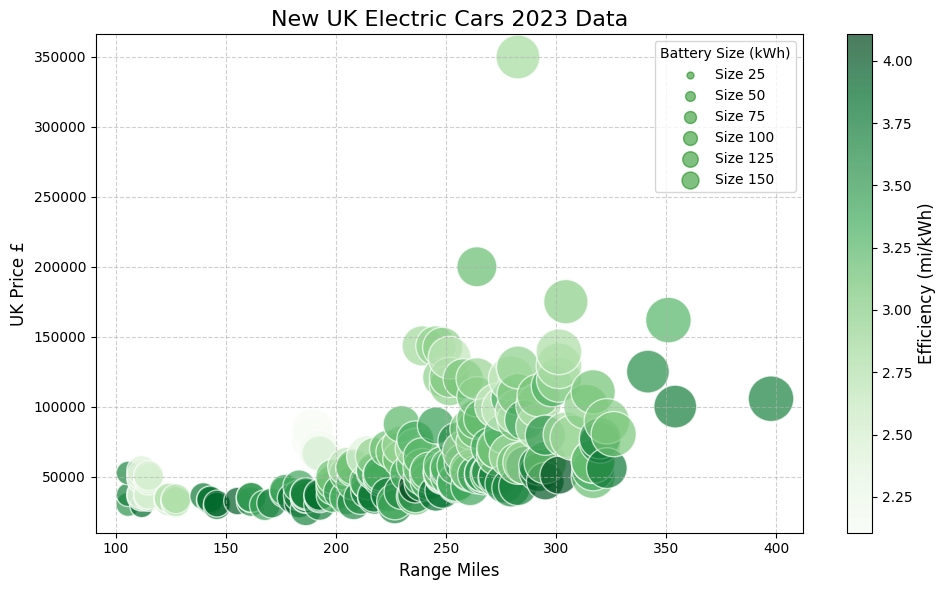

In [22]:
x=df_ecars['Range_mi']
y=df_ecars['UKPrice_£']
sizes=df_ecars['Battery_kWh']*10  # Scale sizes for better visibility
colors=df_ecars['Efficiency_mi/kWh']  # Color by efficiency

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=sizes, c=colors, cmap='Greens', alpha=0.7, edgecolors='w')

# Add labels and title
plt.title("New UK Electric Cars 2023 Data", fontsize=16)
plt.xlabel("Range Miles", fontsize=12)
plt.ylabel("UK Price £", fontsize=12)

# Add a color bar to indicate the color mapping
colorbar = plt.colorbar(scatter)
colorbar.set_label("Efficiency (mi/kWh)", fontsize=12)

# Add a legend for marker size
for size in [25, 50, 75, 100, 125, 150]:
    plt.scatter([], [], s=size, c='green', alpha=0.5, label=f"Size {size}")
plt.legend(title="Battery Size (kWh)", loc="upper right")

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



Can see from the above that as you'd expect in general cars with larger range cost more and have larger batteries, but this trend does not hold well for the lowest range cars where some are considerably dearer than some with conssiderably longer range.
Can also see a mix of higher and lower mi/kWh energy efficiencies across all size ranges i.e. not generally larger for small cars and lower for large cars as might have been anticipated, some larger cars also have good mi/kWh efficiency.
One significant outlier costing £350K and one moderate outlier (£200K) which seem unlikely to result in being shown to be cost effective in subsequent analysis. These are identified immediately below as luxury cars and prices seem reasonable based on manual online research.

Examining cost outliers, it can be seen that these are luxury high power cars and a quick internet search confirmed the prices seem in the right ball park.

In [23]:
df_ecars.sort_values(by=['UKPrice_£'], ascending=[False], inplace=False).head(2)

,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
163,164,Rolls-Royce Spectre,250 km/h,540 km/h,All Wheel Drive,4,350000,282.724595,100.0,2.827246
136,137,Maserati GranTurismo Folgore,320 km/h,990 km/h,All Wheel Drive,4,200000,264.083413,83.0,3.181728


My intention was to use the above data to calculate the average price, battery size and efficiency for electric cars in various user range and annual mileage scenarios and show this on dashboards. However, as mentioned above, I believe presenting lifetime savings for actual Ecars individually could be unfair and have legal implications as my analysis relies on an underlying Kaggle dataset whose data was scraped from an official source in 2023 so now out of date, my modelling relies on other assumptions, has not been independently reviewed and focuses purely on cost and CO2 savings, ignoring performance, reliability, comfort and safety. To reduce this risk, I therefore proposed to derive car archetypes in mileage range bins and calculate the lifetime cost and CO2 savings for car archetype, rather than actual cars.

For each car archetype, each of the variables, (average price, battery size and efficiency) would either be the average in the range bin or possibly calculated based on a linear regression if it strong correlates with range.

Calculating savings based on archetypes is potentially less accurate so I considered removing the Name, indices and other columns clearly identifying individual cars, calculating cost and CO2 savings for each individual car, aggregating the cost and CO2 savings for range bins and showing only aggregate results on the dashboard which could have resulted in more accurate results. However, the results for individual cars would have then still been visible within this Jupyter notebook which is saved on a public Github repository and the underlying price, range, battery size and efficiency data would either have been displayed to showcase my method or if not, relatively easy for someone to extract with little extra code and these could have been readily used to identify each car. I could also have refrained from displaying the results of various calculation steps in this Jupyter notebook before aggregating or even performing all of these calculations in an offline calculation but this would then have either allowed others to add code lines to extract the data or made it impossible to showcase my method so I did not do so.  

Other advantages of calculating savings based on archetypes rather than individual cars include potentially smoothing out data anomalies, e.g. in the ways manufacturers estimate mileage range, and reducing data calculation volume. Regarding the latter, as seen above there are 198 cars and as seen below I have removed just 2 outliers below leaving 196 cars in the analysis. As seen below I created just 9 range archetypes which is considerably less than 196, so this approach had the added benefit of greatly reducing the number of cost and CO2 reductions to be calculated for each user range and annual mileage requirement scenario I considered. But either way, the data volume isn't vast so if doing such a project privately I would have calculated the savings for each car individually, examined the results statistically and compared with those performed using the archetypes.

In order to further visualise the distributions and strength of correlations for price, range, battery size and efficiency, below I have produced pairplots and a correlation matrix for these four numerical variables.

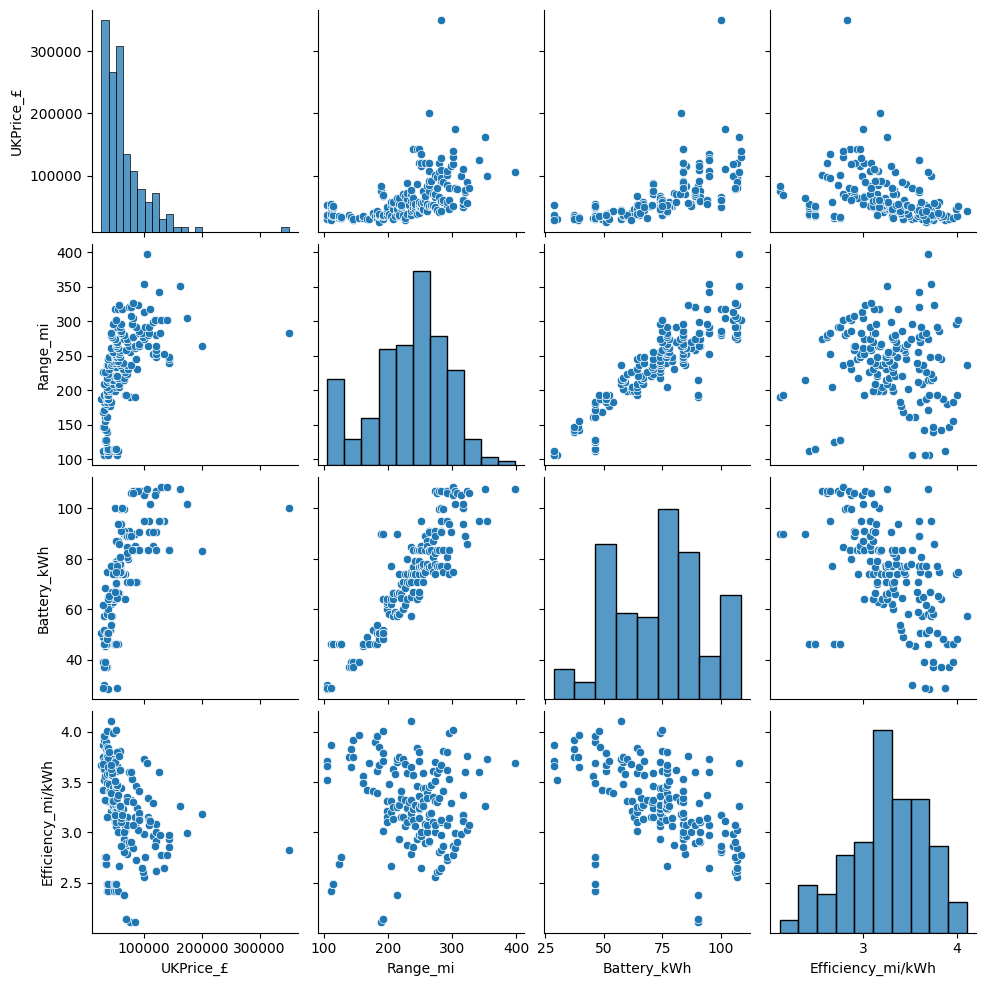

                   UKPrice_£  Range_mi  Battery_kWh  Efficiency_mi/kWh
UKPrice_£           1.000000  0.507168     0.645650          -0.337378
Range_mi            0.507168  1.000000     0.889600           0.108672
Battery_kWh         0.645650  0.889600     1.000000          -0.334708
Efficiency_mi/kWh  -0.337378  0.108672    -0.334708           1.000000


In [24]:
# pairplot and correlation matrix to see if any other trends can be observed
sns.pairplot(data=df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']])
plt.show()
correlation_matrix = df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']].corr(method='pearson')
print(correlation_matrix)

From the above pairplots and correlation matrix I can see the following:-

The strongest correlation is between battery size and range with a high index of 0.89.

The correlation indices between price and range and between price and battery size are 0.51 and 0.65 respectively which is modest. Thus it would seem that estimating Price based on range using linear regression is likely to be less accurate than basing it on the average price in cars within range bins.

Efficiency has a weak negative correlation against UKprice and battery size with indices of -0.34 and 
-0.33 respectively indicating a weak trend of more expensive cars and those with larger batteries having lower efficiency but with many exceptions so plenty choice for consumers to select the more efficient options within their price and range requirements.

The correlation between efficiency and range is very weak (index=0.11) and positive rather than negative suggesting higher range does not mean lower efficiency in fact mildly the opposite on average. 

I then examined the distribution of mileage ranges to see if it was necessary to remove clear outliers which are also likely to comprise only one or very few cars within a mileage range which if included in the final analysis could be too easily identified with the results.

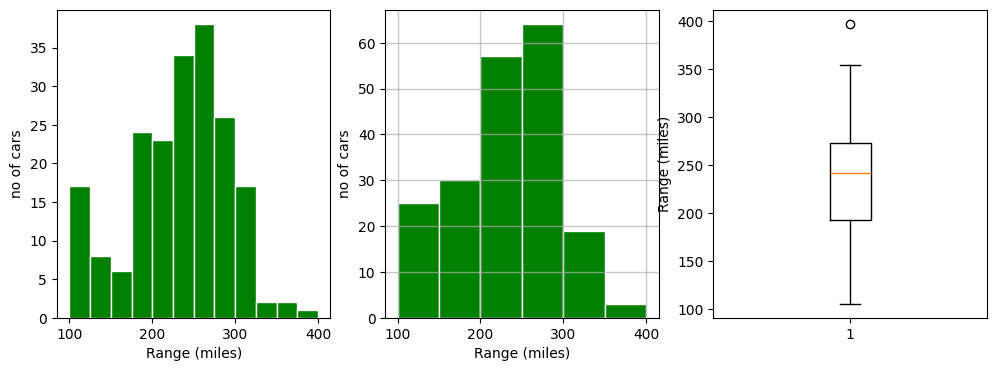

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.hist(df_ecars['Range_mi'], bins=range(100,425,25), color='green', edgecolor='white')
plt.xlabel("Range (miles)")
plt.ylabel("no of cars")
plt.subplot(1,3,2)
plt.hist(df_ecars['Range_mi'], bins=range(100,425,50), color='green', edgecolor='white')
plt.xlabel("Range (miles)")
plt.ylabel("no of cars")
plt.grid(True, which='both', linestyle='-', linewidth=1, alpha=0.7)
plt.subplot(1,3,3)
plt.boxplot(x=df_ecars['Range_mi'])
plt.ylabel("Range (miles)")
plt.show()

So there is one statistical range outlier car with a range of around 400 miles.  There are almost 20 cars with a range between 300 and 350 miles but few of these have a range above 325 miles.  Just as a check below these are shown and seen to be only 5 in number of which only 2 have mileage ranges of 325-350 and only 2 of 350-375, the highest being 354, and 1 is >375 (the outlier).  I could choose to either group the cars into mileage ranges each 50 miles wide or 25 miles wide which would mean excluding the 5 cars with a range of >325 miles or 4 if I still exclude the outlier.  A third option could be to have 25 mile wide range bins up to 300 miles then include the rest in the largest >300 mile bin.  However, the averages in such a bin seem unlikely to be greatly affected since most cars in this bin will have a range between 300-325 miles.  Below I assume a user will select a car based on a regular mileage they need to travel between being able to recharge, e.g. a daily commute or a weekly or very regular family visit, both ways if there is no charging at the place of work or visitation. I also assume a range of this required mileage /0.6 is selected to allow the car to operate with charge levels between 20 and 80% to maximise battery longevity. A range of 325 miles would allow a range of 195 miles staying within the ideal 20-80% charge levels, which is likely to exceed most people's requirements. So I have opted to model car prices and technical parameters in 25 mile wide bins up to 325 miles and exclude the 4 cars with slightly higher ranges of up to 354 miles, all with makers represented in lower range cars ratained in the analysis.

In [26]:
df_ecars.sort_values(by=['Range_mi'], ascending=[False], inplace=False).query("Range_mi > 325")

,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
197,198,Mercedes EQS 450+,210 km/h,960 km/h,Rear Wheel Drive,5,105610,397.678551,107.8,3.689040
196,197,Tesla Model S Dual Motor,250 km/h,790 km/h,All Wheel Drive,5,100000,354.182460,95.0,3.728236
195,196,Mercedes EQS AMG 53 4MATIC+,250 km/h,840 km/h,All Wheel Drive,5,161860,351.075596,107.8,3.256731
194,195,Tesla Model S Plaid,282 km/h,770 km/h,All Wheel Drive,5,125000,341.755005,95.0,3.597421
193,194,Audi Q8 e-tron Sportback 55 quattro,200 km/h,710 km/h,All Wheel Drive,5,80300,326.220687,106.0,3.077554


In [27]:
df_ecars = df_ecars.drop(df_ecars[df_ecars['Range_mi'] > 325].index)
df_ecars


,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
0,1,Mazda MX-30,140 km/h,210 km/h,Front Wheel Drive,5,30050,105.633365,30.0,3.521112
1,2,Honda e Advance,145 km/h,180 km/h,Rear Wheel Drive,4,36920,105.633365,28.5,3.706434
2,3,Mini Cooper SE Convertible,150 km/h,240 km/h,Front Wheel Drive,4,52500,105.633365,28.9,3.655134
3,4,Mini Cooper SE,150 km/h,260 km/h,Front Wheel Drive,4,29000,111.847093,28.9,3.870142
4,5,Citroen e-Jumpy Combi XL 50 kWh,130 km/h,290 km/h,Front Wheel Drive,7,35995,111.847093,46.3,2.415704
...,...,...,...,...,...,...,...,...,...,...
188,189,BMW i7 xDrive60,240 km/h,760 km/h,All Wheel Drive,5,110545,316.900096,101.7,3.116028
189,190,Mercedes EQE 300,210 km/h,650 km/h,Rear Wheel Drive,5,74345,320.006959,89.0,3.595584
190,191,Mercedes EQE 350,210 km/h,650 km/h,Rear Wheel Drive,5,77345,320.006959,89.0,3.595584
191,192,Volkswagen ID.7 Pro S,180 km/h,800 km/h,Rear Wheel Drive,5,56000,323.113823,86.0,3.757137


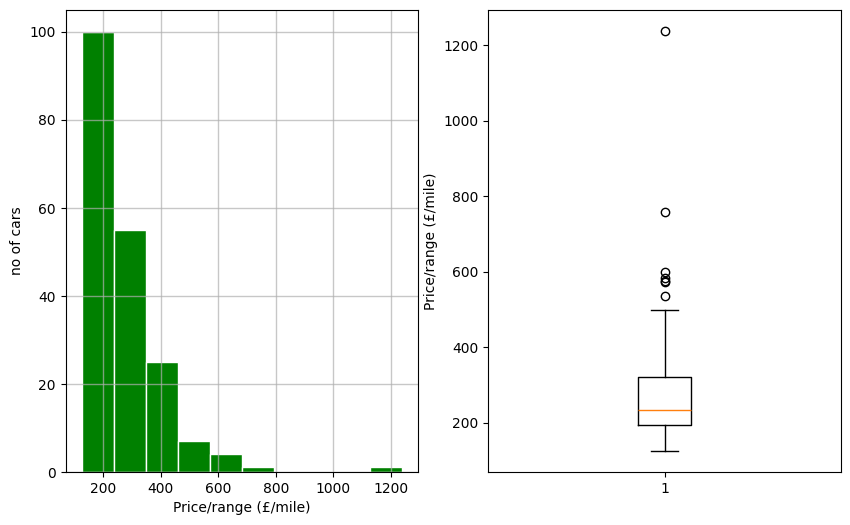

In [28]:
df_ecars['Pricepermilerange'] = df_ecars['UKPrice_£'] / df_ecars['Range_mi']
df_ecars['Pricepermilerange']

#histogram and boxplot of Pricepermilerange to identify outliers
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.hist(df_ecars['Pricepermilerange'], bins=10, color='green', edgecolor='white')
plt.xlabel("Price/range (£/mile)")
plt.ylabel("no of cars")
plt.grid(True, which='both', linestyle='-', linewidth=1, alpha=0.7)
plt.subplot(1,2,2)
plt.boxplot(x=df_ecars['Pricepermilerange'])
plt.ylabel("Price/range (£/mile)")
plt.show()

Again I can see there are 2 clear Pricepermilerange high outliers, but also a small cluster with Pricepermilerange above the top quartile (around £500/mi).  I have identified these cars below.

In [29]:
df_ecars.sort_values(by=['Pricepermilerange'], ascending=[False], inplace=False).query("Pricepermilerange > 500")

,ecarindex,Name,TopSpeed,FastChargeSpeed,Drive,NumberofSeats,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh,Pricepermilerange
163,164,Rolls-Royce Spectre,250 km/h,540 km/h,All Wheel Drive,4,350000,282.724595,100.0,2.827246,1237.953846
136,137,Maserati GranTurismo Folgore,320 km/h,990 km/h,All Wheel Drive,4,200000,264.083413,83.0,3.181728,757.336471
96,97,Porsche Taycan Turbo S Cross Turismo,250 km/h,950 km/h,All Wheel Drive,4,143400,239.228504,83.7,2.858166,599.426899
102,103,Porsche Taycan Turbo S Sport Turismo,260 km/h,970 km/h,All Wheel Drive,4,143400,245.442231,83.7,2.932404,584.251534
181,182,BMW i7 M70 xDrive,250 km/h,730 km/h,All Wheel Drive,5,175000,304.472641,101.7,2.993831,574.764286
111,112,Porsche Taycan Turbo S,260 km/h,980 km/h,All Wheel Drive,4,142400,248.549095,83.7,2.969523,572.92504
117,118,Maserati Grecale Folgore,220 km/h,440 km/h,All Wheel Drive,5,135000,251.655958,95.0,2.649010,536.446667


The 2 clear high Pricepermilerange outliers are also those with the highest absolute price.  I will remove those from the dataset but retain the others since removing them would remove a significant number of cars from the 250-275, 275-300 and 300-325 mile ranges.

Recap of correlation matrix before removing outliers

                   UKPrice_£  Range_mi  Battery_kWh  Efficiency_mi/kWh
UKPrice_£           1.000000  0.476639     0.630774          -0.370345
Range_mi            0.476639  1.000000     0.886102           0.081459
Battery_kWh         0.630774  0.886102     1.000000          -0.367648
Efficiency_mi/kWh  -0.370345  0.081459    -0.367648           1.000000

Revised correlation matrix and pairplot after removing outliers
                   UKPrice_£  Range_mi  Battery_kWh  Efficiency_mi/kWh
UKPrice_£           1.000000  0.548955     0.723284          -0.421180
Range_mi            0.548955  1.000000     0.885698           0.087249
Battery_kWh         0.723284  0.885698     1.000000          -0.363002
Efficiency_mi/kWh  -0.421180  0.087249    -0.363002           1.000000


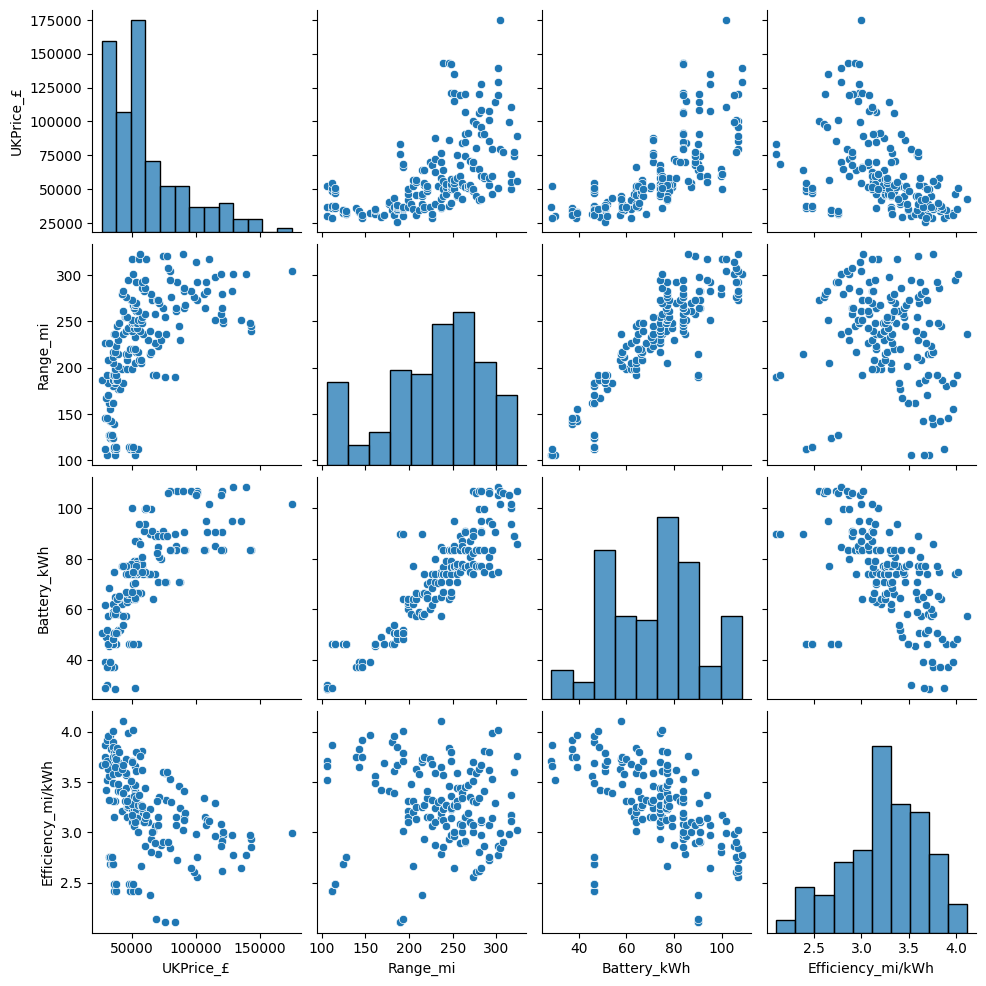

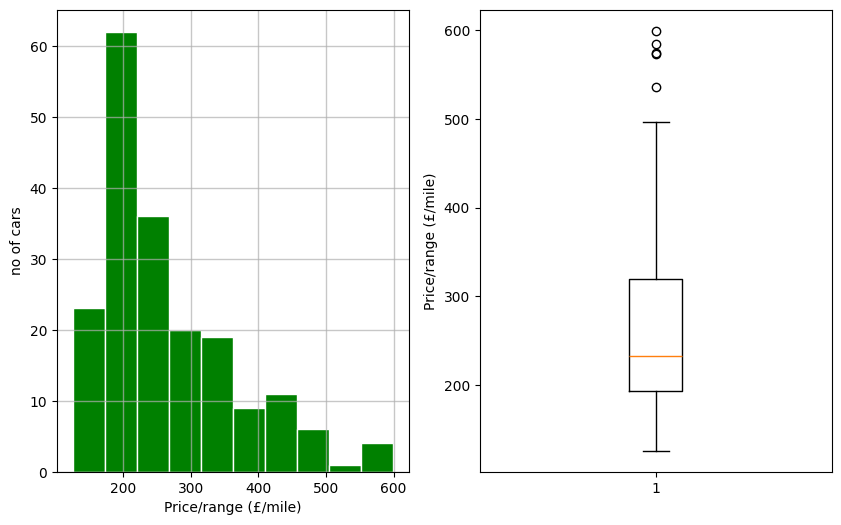

In [30]:
# recap of correlation matrix before removing outliers
print("Recap of correlation matrix before removing outliers\n")
correlation_matrix = df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']].corr(method='pearson')
print(f"{correlation_matrix}\n")

#removal of Pricepermilerange outliers
df_ecars = df_ecars.drop(df_ecars[df_ecars['Pricepermilerange'] > 700].index)
# df_ecars.info()

# revised correlation matrix and pairplot after removing outliers
print("Revised correlation matrix and pairplot after removing outliers")
correlation_matrix = df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']].corr(method='pearson')
print(correlation_matrix)
sns.pairplot(data=df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']])
plt.show()


#revised histogram and boxplot of Pricepermilerange after removing outliers
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.hist(df_ecars['Pricepermilerange'], bins=10, color='green', edgecolor='white')
plt.xlabel("Price/range (£/mile)")
plt.ylabel("no of cars")
plt.grid(True, which='both', linestyle='-', linewidth=1, alpha=0.7)
plt.subplot(1,2,2)
plt.boxplot(x=df_ecars['Pricepermilerange'])
plt.ylabel("Price/range (£/mile)")
plt.show()

I can see most correlations have improved slightly but the only visibly and statistically strong correlation remains the one between range and battery size and this has in fact weakened very slightly due to the removal of the two most expensive cars.  I am therefore reluctant to remove any more cars from the dataset.  

I will add code below to calculate average archetype cars on range bins.

In [31]:
#I added code below to calculate average archetype cars in range bins.

df_ecars['Range_bin'] = pd.cut(df_ecars['Range_mi'], bins=range(100, 400, 25)).astype('string')
df_ecars['Range_min'] = df_ecars['Range_bin'].str.split(',').str[0].str.replace('(', '').astype('Int64')
df_ecars['Range_max'] = df_ecars['Range_bin'].str.split(',').str[1].str.replace(']', '').astype('Int64')
df_ecars[['Range_min', 'Range_max']]

df_ecar_archetypes = pd.DataFrame()
df_ecar_archetypes['Range_min'] = df_ecars[['Range_min']].groupby(df_ecars['Range_bin']).first()
df_ecar_archetypes['Range_max'] = df_ecars[['Range_max']].groupby(df_ecars['Range_bin']).first()
df_ecar_archetypes['ecar_count'] = df_ecars['ecarindex'].groupby(df_ecars['Range_bin']).count()
df_ecar_archetypes['UKPrice_£'] = df_ecars['UKPrice_£'].groupby(df_ecars['Range_bin']).mean()
df_ecar_archetypes['Battery_kWh'] = df_ecars['Battery_kWh'].groupby(df_ecars['Range_bin']).mean()
df_ecar_archetypes['Efficiency_mi/kWh'] = df_ecars['Efficiency_mi/kWh'].groupby(df_ecars['Range_bin']).mean()
df_ecar_archetypes

,Range_min,Range_max,ecar_count,UKPrice_£,Battery_kWh,Efficiency_mi/kWh
Range_bin,,,,,,
"(100, 125]",100,125,17,41020.882353,42.247059,2.782219
"(125, 150]",125,150,8,32495.0,41.125000,3.392275
"(150, 175]",150,175,6,32499.166667,45.416667,3.602435
"(175, 200]",175,200,24,43304.083333,57.854167,3.387611
"(200, 225]",200,225,23,47987.434783,65.243478,3.312670
"(225, 250]",225,250,34,63593.088235,73.379412,3.291008
"(250, 275]",250,275,37,71343.0,82.005405,3.219241
"(275, 300]",275,300,25,79886.76,90.076000,3.221431
"(300, 325]",300,325,17,88553.823529,99.035294,3.184083


In [32]:
# Create a range of annual mileages from 2,500 to 40,000 in increments of 2,500 
# and nominal required ranges aligned with car range bins derived above with battery sizing based on 60% of nominal range to maximise battery longevity.
data = []
for a in range(1, 16):
    for r in range(0, 9):
        row = [2500+2500*a, 100*0.6+r*25*0.6]
        data.append(row)

df_ecarmodel = pd.DataFrame(data, columns=['Annual_mileage','Nominal_required_range_mi'])
df_ecarmodel['Annual_average_daily_mileage'] = df_ecarmodel['Annual_mileage']/365
# Increase required range where annual average daily mileage exceeds nominal required range
df_ecarmodel['AdjustedRange_mi'] = df_ecarmodel[['Nominal_required_range_mi', 'Annual_average_daily_mileage']].max(axis=1)
# Size battery such that only 60% of nominal range is used to maximise battery longevity (80-20% charge cycle)
df_ecarmodel['Required_Range_mi'] = df_ecarmodel['AdjustedRange_mi'] /0.6
df_ecarmodel

,Annual_mileage,Nominal_required_range_mi,Annual_average_daily_mileage,AdjustedRange_mi,Required_Range_mi
0,5000,60.0,13.698630,60.0,100.0
1,5000,75.0,13.698630,75.0,125.0
2,5000,90.0,13.698630,90.0,150.0
3,5000,105.0,13.698630,105.0,175.0
4,5000,120.0,13.698630,120.0,200.0
...,...,...,...,...,...
130,40000,120.0,109.589041,120.0,200.0
131,40000,135.0,109.589041,135.0,225.0
132,40000,150.0,109.589041,150.0,250.0
133,40000,165.0,109.589041,165.0,275.0


In [33]:
#this will be amended to cross with average cars in bins rather than all cars

pd.set_option('display.max_columns', 15)
df_ecarmodel = pd.merge(df_ecarmodel, df_ecar_archetypes, how='cross')
df_ecarmodel

,Annual_mileage,Nominal_required_range_mi,Annual_average_daily_mileage,AdjustedRange_mi,Required_Range_mi,Range_min,Range_max,ecar_count,UKPrice_£,Battery_kWh,Efficiency_mi/kWh
0,5000,60.0,13.698630,60.0,100.0,100,125,17,41020.882353,42.247059,2.782219
1,5000,60.0,13.698630,60.0,100.0,125,150,8,32495.0,41.125000,3.392275
2,5000,60.0,13.698630,60.0,100.0,150,175,6,32499.166667,45.416667,3.602435
3,5000,60.0,13.698630,60.0,100.0,175,200,24,43304.083333,57.854167,3.387611
4,5000,60.0,13.698630,60.0,100.0,200,225,23,47987.434783,65.243478,3.312670
...,...,...,...,...,...,...,...,...,...,...,...
1210,40000,180.0,109.589041,180.0,300.0,200,225,23,47987.434783,65.243478,3.312670
1211,40000,180.0,109.589041,180.0,300.0,225,250,34,63593.088235,73.379412,3.291008
1212,40000,180.0,109.589041,180.0,300.0,250,275,37,71343.0,82.005405,3.219241
1213,40000,180.0,109.589041,180.0,300.0,275,300,25,79886.76,90.076000,3.221431


Drop rows where cars are not suitable because they have insufficient range

In [34]:
df_ecarmodel['Car_Suitable'] = df_ecarmodel['Range_min'] >= df_ecarmodel['Required_Range_mi']
df_ecarmodel = df_ecarmodel.drop(df_ecarmodel[df_ecarmodel['Car_Suitable'] == False].index)
df_ecarmodel


,Annual_mileage,Nominal_required_range_mi,Annual_average_daily_mileage,AdjustedRange_mi,Required_Range_mi,Range_min,Range_max,ecar_count,UKPrice_£,Battery_kWh,Efficiency_mi/kWh,Car_Suitable
0,5000,60.0,13.698630,60.0,100.0,100,125,17,41020.882353,42.247059,2.782219,True
1,5000,60.0,13.698630,60.0,100.0,125,150,8,32495.0,41.125000,3.392275,True
2,5000,60.0,13.698630,60.0,100.0,150,175,6,32499.166667,45.416667,3.602435,True
3,5000,60.0,13.698630,60.0,100.0,175,200,24,43304.083333,57.854167,3.387611,True
4,5000,60.0,13.698630,60.0,100.0,200,225,23,47987.434783,65.243478,3.312670,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,40000,150.0,109.589041,150.0,250.0,275,300,25,79886.76,90.076000,3.221431,True
1196,40000,150.0,109.589041,150.0,250.0,300,325,17,88553.823529,99.035294,3.184083,True
1204,40000,165.0,109.589041,165.0,275.0,275,300,25,79886.76,90.076000,3.221431,True
1205,40000,165.0,109.589041,165.0,275.0,300,325,17,88553.823529,99.035294,3.184083,True


View info on data columns for ecarmodel

In [35]:
df_ecarmodel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642 entries, 0 to 1214
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual_mileage                642 non-null    int64  
 1   Nominal_required_range_mi     642 non-null    float64
 2   Annual_average_daily_mileage  642 non-null    float64
 3   AdjustedRange_mi              642 non-null    float64
 4   Required_Range_mi             642 non-null    float64
 5   Range_min                     642 non-null    Int64  
 6   Range_max                     642 non-null    Int64  
 7   ecar_count                    642 non-null    int64  
 8   UKPrice_£                     642 non-null    Float64
 9   Battery_kWh                   642 non-null    float64
 10  Efficiency_mi/kWh             642 non-null    float64
 11  Car_Suitable                  642 non-null    boolean
dtypes: Float64(1), Int64(2), boolean(1), float64(6), int64(2)
memory usa

Set user variables

In [36]:
HomeCharger=0 #0=No,1=Yes
loan=1 #0=No loan, 1=Loan
interest_rate=0.075 #ignored if no loan
NeworUsed=1 #1=New, 2=Used
AlternativePetrolCar=1 #1=Equivalent, 2=cheapest
EquivalentNewPetroltoEcarPriceRatio=0.8 #New Ecar price as a ratio of equivalent new petrol car price
EquivalentUsedPetroltoEcarPriceRatio=0.8 #Used Ecar price as a ratio of equivalent used petrol car price
AnnualServicingCost=2 #1=Low, 2=Med, 3=High
HomeChargerCost=1000*HomeCharger #£
HomeChargerCapacity_kW=7*HomeCharger
NightRate_period_hrs=7 #hours
HomeChargeTimeAvailable_hrs=HomeCharger*10 #hours
HomeChargeTime_NightRate_hrs=min(HomeChargeTimeAvailable_hrs, NightRate_period_hrs)
ElecHomeNightRate=13.01 #p/kWh
ElecHomeDayRate=31.26 #p/kWh
ElecPublicChargerRate=51.00 #p/kWh
PetrolPrice=1.50 #£/litre

TimePeriod= 8 if NeworUsed==1 else 4 #years
TotalRepaymenttoUpfrontratio=1 if(loan==0) else (TimePeriod*interest_rate/(1-(1+interest_rate)**(-TimePeriod)))
HomeChargerRepayment= HomeChargerCost*TotalRepaymenttoUpfrontratio
print(f"Check\n")
print(f"time period = {TimePeriod} years")
print(f"TotalRepaymenttoUpfrontratio = {TotalRepaymenttoUpfrontratio}")
print(f"HomeChargerRepayment = {HomeChargerRepayment}")


Check

time period = 8 years
TotalRepaymenttoUpfrontratio = 1.3658161857610454
HomeChargerRepayment = 0.0


Add various additional calculated columns to df_EcarModel dataframe ultimately calculate cost saving for each range and annual mileage scenario for each Ecar in Cheapestelectriccars-EVDatabase_2023.csv

In [37]:
df_ecarmodel['Utilised_battery_capacity_kWh'] = df_ecarmodel['Required_Range_mi']/df_ecarmodel['Efficiency_mi/kWh']
df_ecarmodel['TotalEcarCostInclInterest'] = df_ecarmodel['UKPrice_£']*TotalRepaymenttoUpfrontratio
df_ecarmodel['HomeChargeTime_hrs'] = np.where(HomeCharger==0, 0, df_ecarmodel['Utilised_battery_capacity_kWh'] / HomeChargerCapacity_kW)
df_ecarmodel['HomeChargeTime_NightRate_hrs'] = df_ecarmodel['HomeChargeTime_hrs'].clip(upper=HomeChargeTimeAvailable_hrs).clip(upper=NightRate_period_hrs)
df_ecarmodel['HomeChargeTime_DayRate_hrs'] = df_ecarmodel['HomeChargeTime_hrs'].clip(upper=HomeChargeTimeAvailable_hrs) - df_ecarmodel['HomeChargeTime_NightRate_hrs']
df_ecarmodel['HomeCharge_NightRate_kWh'] = df_ecarmodel['HomeChargeTime_NightRate_hrs'] * HomeChargerCapacity_kW
df_ecarmodel['HomeCharge_DayRate_kWh'] = df_ecarmodel['HomeChargeTime_DayRate_hrs'] * HomeChargerCapacity_kW
df_ecarmodel['PublicCharge_kWh'] = df_ecarmodel['Utilised_battery_capacity_kWh'] - df_ecarmodel['HomeCharge_NightRate_kWh'] - df_ecarmodel['HomeCharge_DayRate_kWh']
df_ecarmodel['NightRateShare']= (df_ecarmodel['HomeCharge_NightRate_kWh']/df_ecarmodel['Utilised_battery_capacity_kWh'])
df_ecarmodel['DayRateShare']= (df_ecarmodel['HomeCharge_DayRate_kWh']/df_ecarmodel['Utilised_battery_capacity_kWh'])
df_ecarmodel['PublicShare']= (df_ecarmodel['PublicCharge_kWh']/df_ecarmodel['Utilised_battery_capacity_kWh'])
df_ecarmodel['aggregateelec_p/kWh']= (ElecHomeNightRate*df_ecarmodel['NightRateShare'] + ElecHomeDayRate*df_ecarmodel['DayRateShare'] + ElecPublicChargerRate*df_ecarmodel['PublicShare'])
df_ecarmodel['aggregateelec_p/kWh']=df_ecarmodel['aggregateelec_p/kWh']/df_ecarmodel['Efficiency_mi/kWh']

In [39]:
df_ecarmodel.info()
df_ecarmodel

<class 'pandas.core.frame.DataFrame'>
Index: 642 entries, 0 to 1214
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual_mileage                 642 non-null    int64  
 1   Nominal_required_range_mi      642 non-null    float64
 2   Annual_average_daily_mileage   642 non-null    float64
 3   AdjustedRange_mi               642 non-null    float64
 4   Required_Range_mi              642 non-null    float64
 5   Range_min                      642 non-null    Int64  
 6   Range_max                      642 non-null    Int64  
 7   ecar_count                     642 non-null    int64  
 8   UKPrice_£                      642 non-null    Float64
 9   Battery_kWh                    642 non-null    float64
 10  Efficiency_mi/kWh              642 non-null    float64
 11  Car_Suitable                   642 non-null    boolean
 12  Utilised_battery_capacity_kWh  642 non-null    float64

,Annual_mileage,Nominal_required_range_mi,Annual_average_daily_mileage,AdjustedRange_mi,Required_Range_mi,Range_min,Range_max,...,HomeCharge_NightRate_kWh,HomeCharge_DayRate_kWh,PublicCharge_kWh,NightRateShare,DayRateShare,PublicShare,aggregateelec_p/kWh
0,5000,60.0,13.698630,60.0,100.0,100,125,...,0.0,0.0,35.942535,0.0,0.0,1.0,18.330693
1,5000,60.0,13.698630,60.0,100.0,125,150,...,0.0,0.0,29.478746,0.0,0.0,1.0,15.034161
2,5000,60.0,13.698630,60.0,100.0,150,175,...,0.0,0.0,27.759004,0.0,0.0,1.0,14.157092
3,5000,60.0,13.698630,60.0,100.0,175,200,...,0.0,0.0,29.519331,0.0,0.0,1.0,15.054859
4,5000,60.0,13.698630,60.0,100.0,200,225,...,0.0,0.0,30.187126,0.0,0.0,1.0,15.395434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,40000,150.0,109.589041,150.0,250.0,275,300,...,0.0,0.0,77.605271,0.0,0.0,1.0,15.831475
1196,40000,150.0,109.589041,150.0,250.0,300,325,...,0.0,0.0,78.515533,0.0,0.0,1.0,16.017169
1204,40000,165.0,109.589041,165.0,275.0,275,300,...,0.0,0.0,85.365798,0.0,0.0,1.0,15.831475
1205,40000,165.0,109.589041,165.0,275.0,300,325,...,0.0,0.0,86.367087,0.0,0.0,1.0,16.017169


In [40]:
df_ecarmodel[['Annual_mileage', 'Required_Range_mi', 'Utilised_battery_capacity_kWh', 'TotalEcarCostInclInterest']].describe()

,Annual_mileage,Required_Range_mi,Utilised_battery_capacity_kWh,TotalEcarCostInclInterest
count,642.000000,642.000000,642.000000,642.0
mean,21861.370717,174.767066,53.673839,91100.541165
std,10641.525379,51.687881,16.540295,24907.461172
min,5000.000000,100.000000,27.759004,44382.196956
25%,12500.000000,125.570776,39.257767,65542.015139
50%,22500.000000,175.000000,52.827471,97441.424141
75%,30000.000000,200.000000,62.812427,109110.629836
max,40000.000000,300.000000,94.218640,120948.245487


In [42]:
df_ecarmodel[['Annual_mileage','Required_Range_mi','Utilised_battery_capacity_kWh', 'TotalEcarCostInclInterest']]

,Annual_mileage,Required_Range_mi,Utilised_battery_capacity_kWh,TotalEcarCostInclInterest
0,5000,100.0,35.942535,56026.985072
1,5000,100.0,29.478746,44382.196956
2,5000,100.0,27.759004,44387.887857
3,5000,100.0,29.519331,59145.417926
4,5000,100.0,30.187126,65542.015139
...,...,...,...,...
1195,40000,250.0,77.605271,109110.629836
1196,40000,250.0,78.515533,120948.245487
1204,40000,275.0,85.365798,109110.629836
1205,40000,275.0,86.367087,120948.245487


---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
